## Plan of Action

*   **CK+ Dataset images** are stored **in separate folders,** named basis their emotion labels:
 *   0 = 'anger', 1 = 'contempt',  2 = 'disgust',    3 = 'fear',    4 = 'happy',    5 = 'sadness',    6 = 'surprise'

* Convert all images to **grayscale**
* **Define emotion labels** basis use case
* Using **X epochs** on our **defined CNN Architecture**, comprising of:
    - an input *Conv2D* layer (with 32 filters) paired with an *MaxPooling2D* layer,
    - 3 pairs of *Conv2D* (with 64, 128 & 256 filters) and *MaxPooling2D* layers,
    - 1 *Dense* layer with 128 nodes, and
    - an output *Dense* layer with 3 nodes.

# Mount Google Drive

In [1]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: CK+48/
   creating: CK+48/anger/
  inflating: CK+48/anger/S010_004_00000017.png  
  inflating: CK+48/anger/S010_004_00000018.png  
  inflating: CK+48/anger/S010_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000020.png  
  inflating: CK+48/anger/S011_004_00000021.png  
  inflating: CK+48/anger/S014_003_00000028.png  
  inflating: CK+48/anger/S014_003_00000029.png  
  inflating: CK+48/anger/S014_003_00000030.png  
  inflating: CK+48/anger/S022_005_00000030.png  
  inflating: CK+48/anger/S022_005_00000031.png  
  inflating: CK+48/anger/S022_005_00000032.png  
  inflating: CK+48/anger/S026_003_00000013.png  
  inflating: CK+48/anger/S026_003_00000014.png  
  inflating: CK+48/anger/S026_003_00000015.png  
  inflating: CK+48/anger/S028_001_00000022.png  
  inflating: CK+48/anger/S028_001_00000023.png  
  inflating: CK+48/anger/S028_001_00000024.png  
  inflating: CK+48/anger/S029_001_00000017.png  
 

In [3]:
%ls

CK+48/  dataset.zip  sample_data/


# Import Libraties/ Functions

In [4]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

# Import Dataset

In [5]:
dataset_folder='./CK+48/'
sub_folders=os.listdir(dataset_folder)

sub_folders

['happy', 'sadness', 'surprise', 'disgust', 'fear', 'anger', 'contempt']

In [6]:
# Reading folder names as labels and images underneath
i=0
last=[]
images=[]
labels=[]
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
  new_label = sub_folder_index


  path = dataset_folder+'/'+sub_folder
  sub_folder_images= os.listdir(path)

  # reading images in the sub folder, one at a time
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(new_label))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(new_label)
    i+=1
  last.append(i)

./CK+48//happy/S096_004_00000011.png	0
./CK+48//happy/S056_004_00000019.png	0
./CK+48//happy/S014_005_00000016.png	0
./CK+48//happy/S108_008_00000013.png	0
./CK+48//happy/S011_006_00000012.png	0
./CK+48//happy/S057_006_00000032.png	0
./CK+48//happy/S052_004_00000031.png	0
./CK+48//happy/S078_004_00000025.png	0
./CK+48//happy/S086_002_00000013.png	0
./CK+48//happy/S052_004_00000032.png	0
./CK+48//happy/S138_005_00000015.png	0
./CK+48//happy/S071_005_00000020.png	0
./CK+48//happy/S097_006_00000019.png	0
./CK+48//happy/S026_006_00000011.png	0
./CK+48//happy/S134_004_00000013.png	0
./CK+48//happy/S085_002_00000014.png	0
./CK+48//happy/S114_006_00000022.png	0
./CK+48//happy/S072_006_00000020.png	0
./CK+48//happy/S044_003_00000014.png	0
./CK+48//happy/S089_002_00000019.png	0
./CK+48//happy/S014_005_00000015.png	0
./CK+48//happy/S050_006_00000022.png	0
./CK+48//happy/S130_013_00000014.png	0
./CK+48//happy/S093_004_00000016.png	0
./CK+48//happy/S094_004_00000012.png	0
./CK+48//happy/S069_004_0

In [7]:
images_x = np.array(images)
labels_y = np.array(labels)

In [8]:
images_x.shape

(981, 48, 48)

In [9]:
# encoding the labels
num_of_classes = 7
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)

# Split into Train / Test

In [10]:
X_train, X_test, Y_train, Y_test= train_test_split(images_x, labels_y_encoded,test_size=0.25, random_state=10)

In [11]:
len(X_train)

735

In [12]:
len(X_test)

246

# Define CNN Architecture

# Model Training

In [13]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import keras
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2

In [14]:
def cnn_model():

  model= tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(512,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(7, activation='softmax'))
  return model

In [15]:
# **Compile Model**
model = cnn_model()
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Adjusted LR
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
# **Callbacks**
checkpoint = ModelCheckpoint('./emotion_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)  # Dynamic LR adjustment
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

In [17]:
# **Train Model**
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=32,  # Reduced batch size
    epochs=50,
    callbacks=[checkpoint, reduce_lr, early_stopping],
    verbose=1
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.1772 - loss: 2.6653
Epoch 1: val_loss improved from inf to 17.20019, saving model to ./emotion_model.h5


23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 779ms/step - accuracy: 0.1787 - loss: 2.6606 - val_accuracy: 0.0894 - val_loss: 17.2002 - learning_rate: 5.0000e-04
Epoch 2/50
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2948 - loss: 2.1936
Epoch 2: val_loss improved from 17.20019 to 8.25872, saving model to ./emotion_model.h5


23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.2957 - loss: 2.1869 - val_accuracy: 0.1504 - val_loss: 8.2587 - learning_rate: 5.0000e-04
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3994 - loss: 1.7787
Epoch 3: val_loss improved from 8.25872 to 3.62881, saving model to ./emotion_model.h5


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.3988 - loss: 1.7794 - val_accuracy: 0.2520 - val_loss: 3.6288 - learning_rate: 5.0000e-04
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4915 - loss: 1.4900
Epoch 4: val_loss improved from 3.62881 to 1.38679, saving model to ./emotion_model.h5


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4908 - loss: 1.4920 - val_accuracy: 0.4431 - val_loss: 1.3868 - learning_rate: 5.0000e-04
Epoch 5/50
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5764 - loss: 1.3063
Epoch 5: val_loss improved from 1.38679 to 1.17921, saving model to ./emotion_model.h5


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5753 - loss: 1.3002 - val_accuracy: 0.5569 - val_loss: 1.1792 - learning_rate: 5.0000e-04
Epoch 6/50
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5855 - loss: 1.2430
Epoch 6: val_loss improved from 1.17921 to 0.90310, saving model to ./emotion_model.h5


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5879 - loss: 1.2335 - val_accuracy: 0.6707 - val_loss: 0.9031 - learning_rate: 5.0000e-04
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6966 - loss: 0.8541
Epoch 7: val_loss improved from 0.90310 to 0.84375, saving model to ./emotion_model.h5


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6958 - loss: 0.8564 - val_accuracy: 0.6951 - val_loss: 0.8437 - learning_rate: 5.0000e-04
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7534 - loss: 0.7542
Epoch 8: val_loss improved from 0.84375 to 0.60705, saving model to ./emotion_model.h5


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7523 - loss: 0.7567 - val_accuracy: 0.7805 - val_loss: 0.6071 - learning_rate: 5.0000e-04
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7729 - loss: 0.6949
Epoch 9: val_loss did not improve from 0.60705
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7731 - loss: 0.6937 - val_accuracy: 0.7154 - val_loss: 0.7554 - learning_rate: 5.0000e-04
Epoch 10/50
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8152 - loss: 0.5281
Epoch 10: val_loss did not improve from 0.60705
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8151 - loss: 0.5322 - val_accuracy: 0.7033 - val_loss: 0.9018 - learning_rate: 5.0000e-04
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8034 - loss: 0.5079
Epoch 11: val_loss improved from 0.60705 to 0.47530, saving model to ./emotion_model.h5


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8035 - loss: 0.5073 - val_accuracy: 0.8130 - val_loss: 0.4753 - learning_rate: 5.0000e-04
Epoch 12/50
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8017 - loss: 0.5166
Epoch 12: val_loss improved from 0.47530 to 0.39426, saving model to ./emotion_model.h5


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8029 - loss: 0.5146 - val_accuracy: 0.8415 - val_loss: 0.3943 - learning_rate: 5.0000e-04
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8693 - loss: 0.3960
Epoch 13: val_loss did not improve from 0.39426
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8693 - loss: 0.3959 - val_accuracy: 0.8496 - val_loss: 0.4514 - learning_rate: 5.0000e-04
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8931 - loss: 0.3545
Epoch 14: val_loss did not improve from 0.39426
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8934 - loss: 0.3528 - val_accuracy: 0.8049 - val_loss: 0.5315 - learning_rate: 5.0000e-04
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8916 - loss: 0.3020
Epoch 15: val_loss did not improve from 0.39426

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8919 - loss: 0.3009 - val_accuracy

# Model Performance

In [18]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

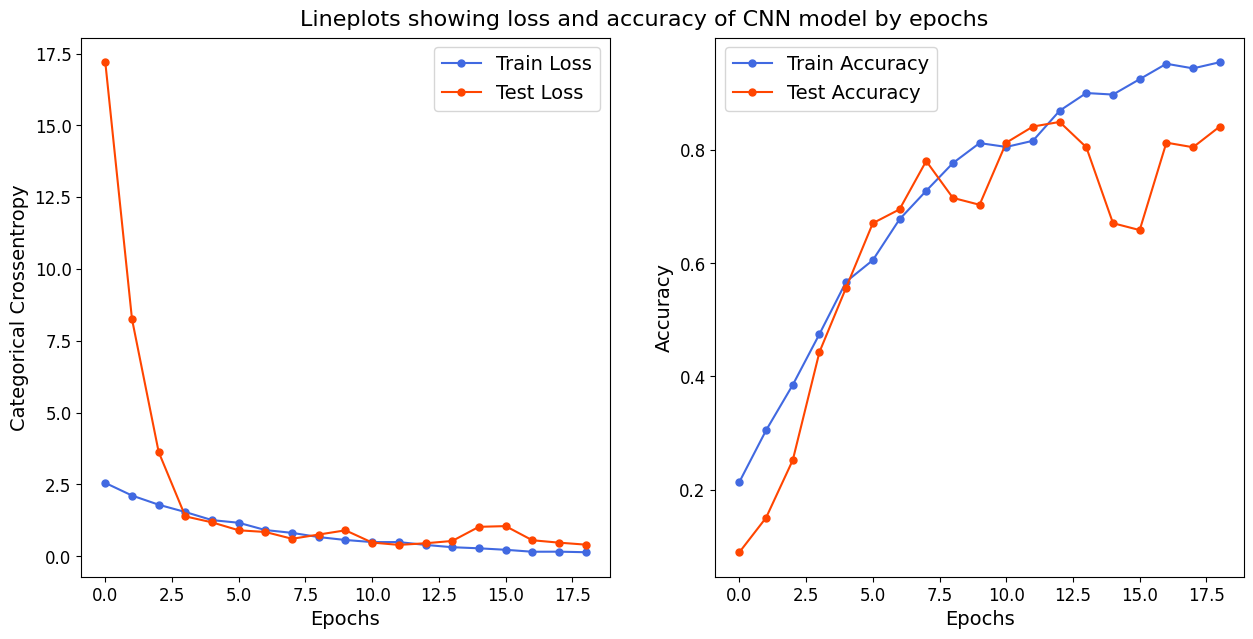

In [19]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

In [21]:
# **Convert Model to TFLite**
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("./emotion_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model saved as emotion_model.tflite")

Saved artifact at '/tmp/tmpws8gf_gg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  132917199043664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132917199043280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132917199964880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132917199963536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132917199964688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132917199965840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132917199964304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132917199963152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132917199967568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132917199969104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132917199966800: